# Objective 
The aim is to advise farmers on the most suitable crops for cultivation by analyzing various factors, empowering them to make educated choices prior to planting.

# Data background 
The dataset for this project is created by blending together different publicly available datasets from India, like those containing information about weather and soil. It's been designed to be easy to understand, with only a few but important details, unlike more complicated datasets that might affect crop yields.

This dataset includes details about the soil, such as its Nitrogen, Phosphorous, Potassium, and pH levels, as well as information about the weather conditions needed for specific crops, like humidity, temperature, and rainfall.

# Importing libraries

In [1]:

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from surprise import Dataset, Reader

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [2]:
df=pd.read_csv("Extracted Data/Updated_CropRecomendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()


,N,P,K,temperature,humidity,ph,rainfall,label
495,87,44,43,23.874845,86.792613,6.718725,177.514731,jute
496,88,52,39,23.928879,88.071123,6.880205,154.660874,jute
497,90,39,37,24.814412,81.686889,6.861069,190.788639,jute
498,90,39,43,24.447439,82.286484,6.769346,190.968489,jute
499,84,38,43,26.574217,73.819949,7.261581,159.322307,jute


In [5]:
df.size


4000

In [6]:
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
df.shape


(500, 8)

In [8]:
df['label'].unique()


array(['rice', 'maize', 'banana', 'coconut', 'jute'], dtype=object)

In [9]:
df.dtypes


N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()


rice       100
maize      100
banana     100
coconut    100
jute       100
Name: label, dtype: int64

<Axes: >

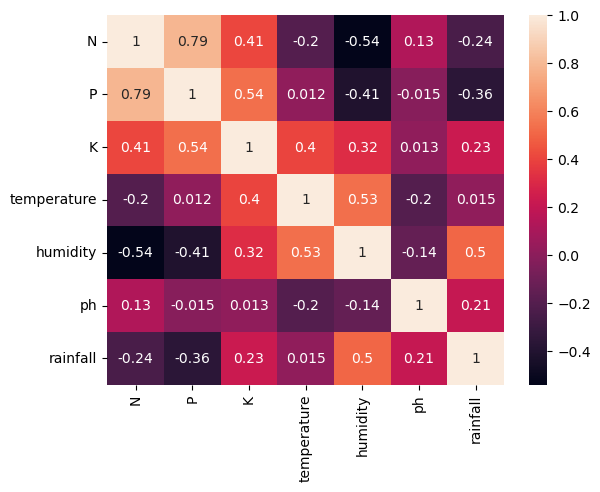

In [11]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)

When working with correlation matrices and heatmaps, it's common to focus on numerical data because correlation is a statistical measure that quantifies the strength and direction of the relationship between two numerical variables.

#### Agricultural Parameter Averages Across Crop Types


In [12]:
grouped=df.groupby(by='label').mean().reset_index()
grouped

,label,N,P,K,temperature,humidity,ph,rainfall
0,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
1,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
2,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
3,maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
4,rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114


#### Summary:
- Banana: Prefers moderate temperatures and humidity, high in nutrients, and requires moderate rainfall.
- Coconut: Thrives in high humidity, moderate temperatures, and high rainfall but needs lower nutrient levels compared to banana.
- Jute: Prefers high humidity and rainfall, moderate temperatures, and has high potassium requirements.
- Maize: Grows in cooler temperatures, moderate humidity, and lower rainfall compared to rice and jute.
- Rice: Requires high rainfall and moderate temperatures, with slightly lower nutrient requirements.
- Humidity and Rainfall: Crops with high humidity and rainfall requirements (e.g., Coconut, Jute, Rice) are generally suited to tropical or      subtropical regions with ample moisture. In contrast, crops like Maize prefer drier conditions.
- Temperature Preferences: Most crops have a preference for moderate temperatures, though specific needs can vary. Bananas and coconuts thrive in similar temperature ranges, while maize prefers cooler conditions.
- Nutrient Needs: Nutrient requirements can vary significantly, with bananas needing high nutrient levels and crops like coconut being less demanding in terms of soil fertility.


### Lowest Agricultural Parameter Requirements: Top 5 Crops¶


In [13]:
for i in grouped.columns[1:]:
    print(f'Top 5 least {i} requiring crops:')
    for j,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} -->{k}')
    print(f'***************************************')

Top 5 least N requiring crops:
coconut -->21.98
maize -->77.76
jute -->78.4
rice -->79.89
banana -->100.23
***************************************
Top 5 least P requiring crops:
coconut -->16.93
jute -->46.86
rice -->47.58
maize -->48.44
banana -->82.01
***************************************
Top 5 least K requiring crops:
maize -->19.79
coconut -->30.59
rice -->39.87
jute -->39.99
banana -->50.05
***************************************
Top 5 least temperature requiring crops:
maize -->22.3892039102
rice -->23.6893322105
jute -->24.9583758265
banana -->27.3767983057
coconut -->27.4098921723
***************************************
Top 5 least humidity requiring crops:
maize -->65.0922494467
jute -->79.6398642063
banana -->80.35812258109999
rice -->82.2728215389
coconut -->94.84427180610001
***************************************
Top 5 least ph requiring crops:
coconut -->5.97656212619
banana -->5.98389318024
maize -->6.2451897224
rice -->6.425470922140001
jute -->6.7327775681699995
****

## DATA VISUALIZATION AND ANALYSIS¶


### Insights from Numerical Feature Visualizations¶


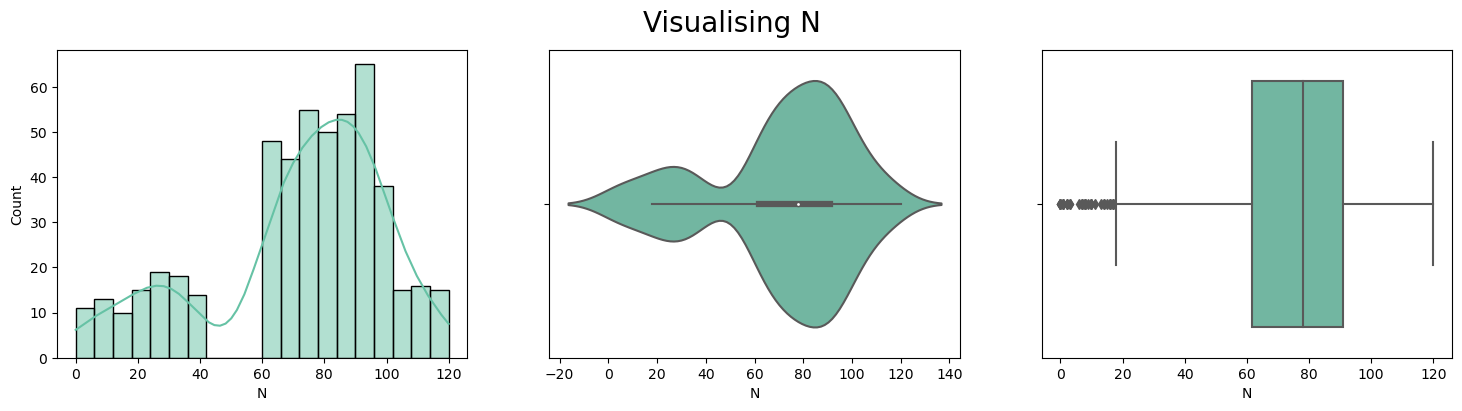

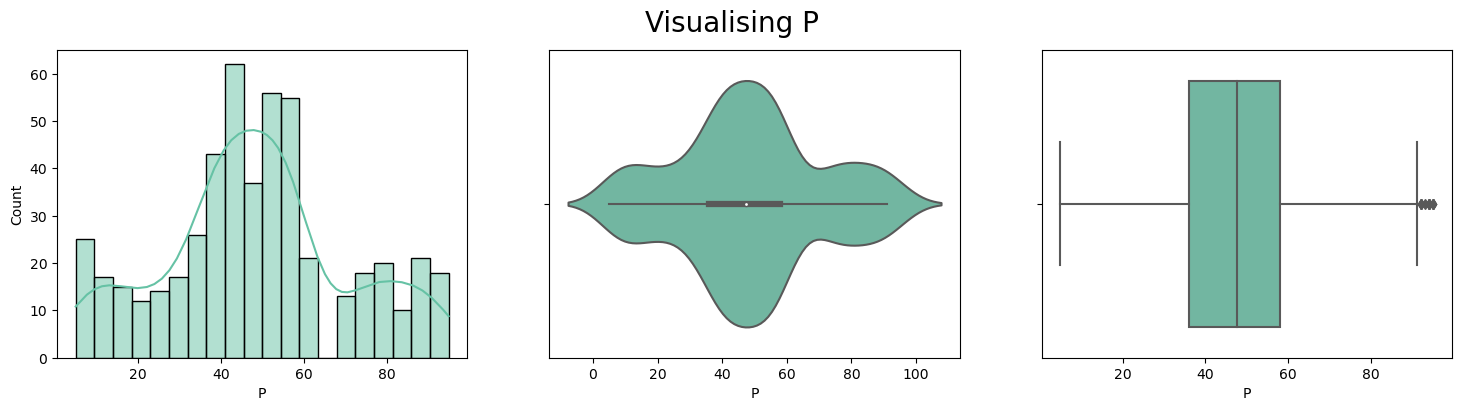

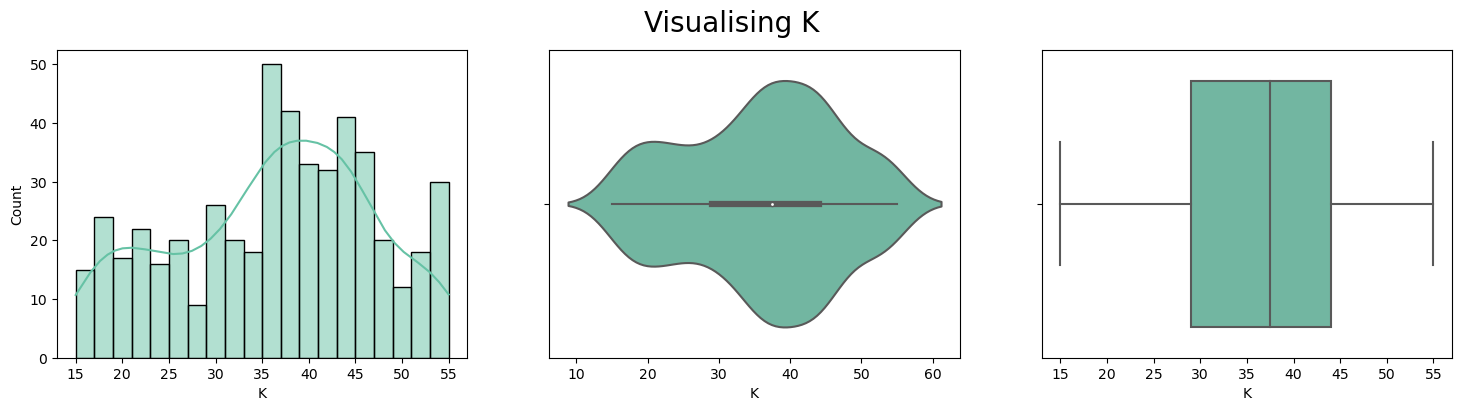

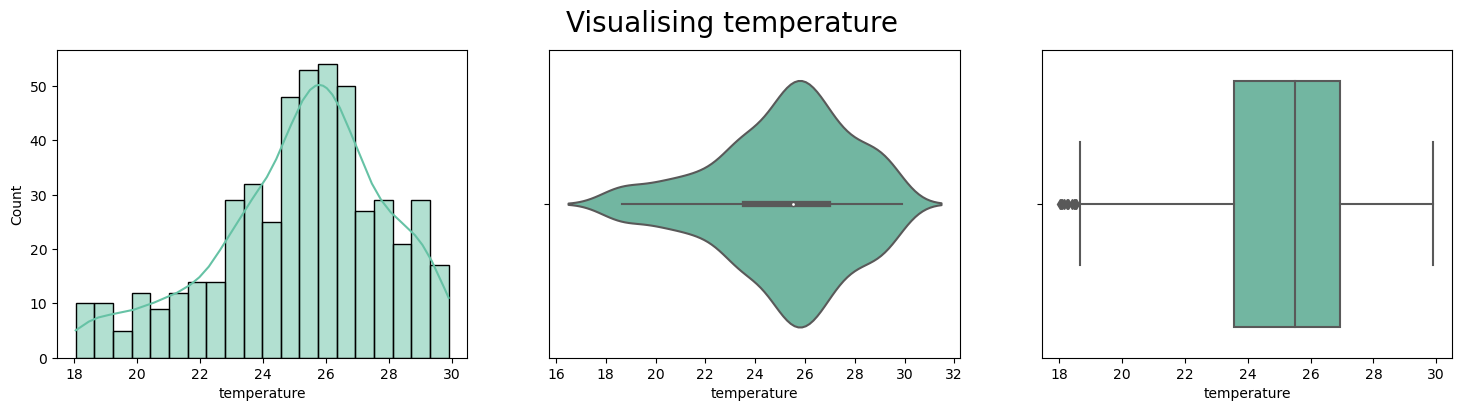

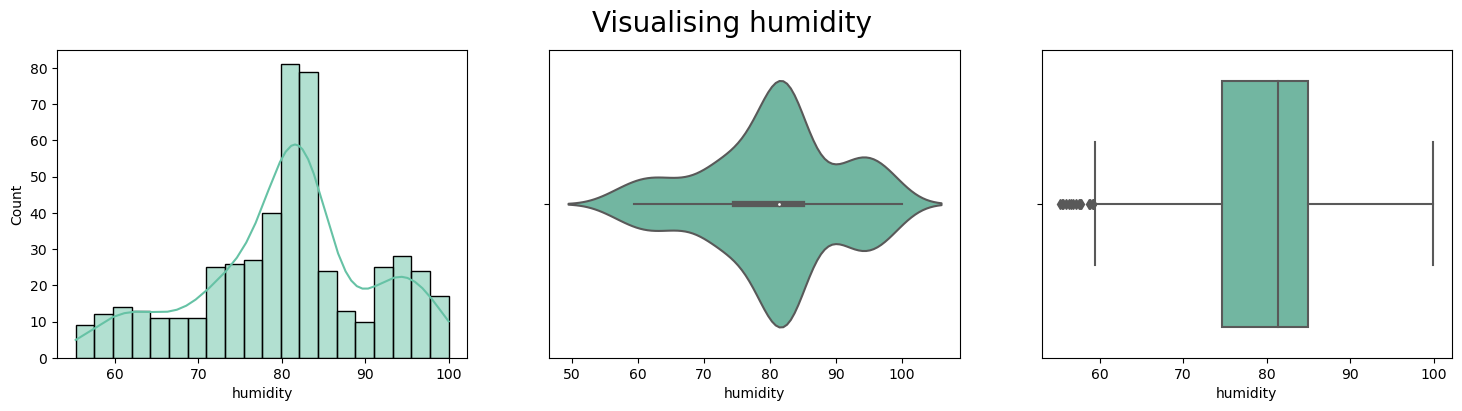

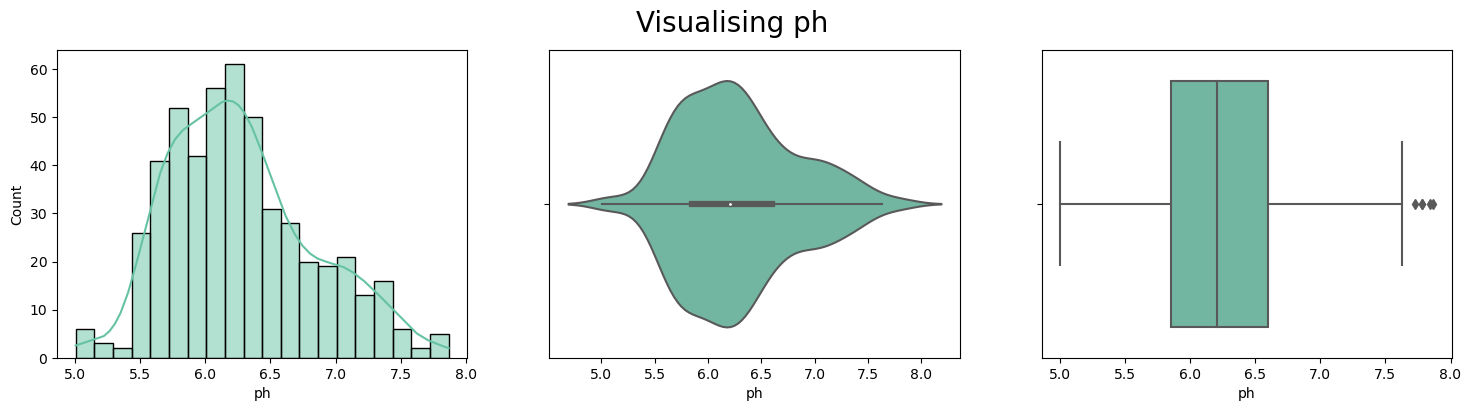

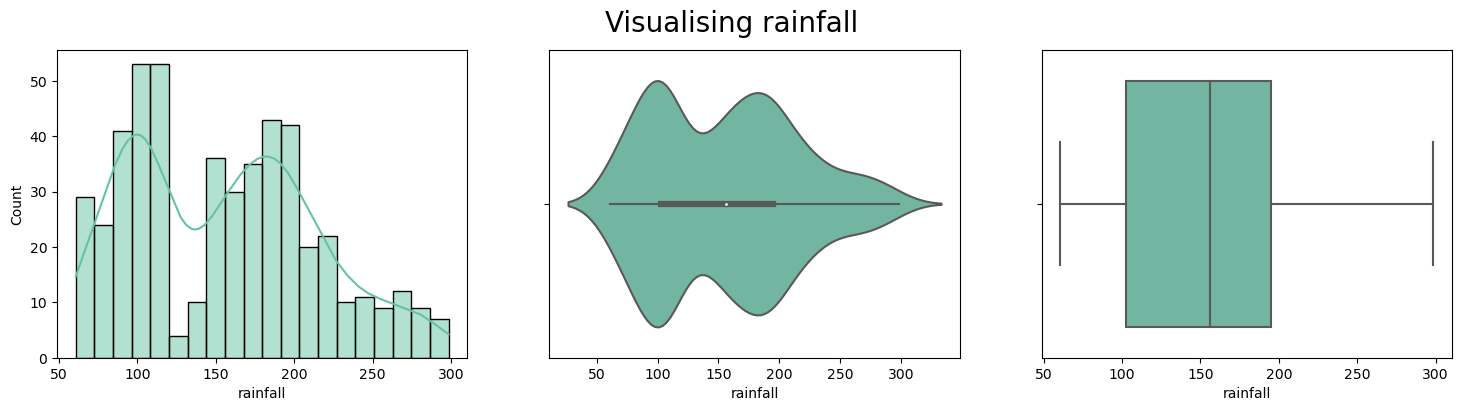

In [14]:
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20, ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualising {i}',size=20)

### Summary
#### Nitrogen
- Nitrogen levels exhibit a bimodal distribution with two distinct peaks, suggesting the presence of two subgroups or clusters in the data. The data is slightly skewed to the right and has a moderate spread. A few outliers are present in the dataset.
#### Phosporous
- Phosporous levels are skewed to the right, with most values concentrated in the lower range and a few outliers pulling the data towards higher values.
#### Potassium
- Potassium levels show a consistent and narrow distribution centered around 35, indicating a relatively homogenous population with minimal variation.
#### Temperature
- Temperature data is normally distributed around 25, with few outliers. Most values fall between 20 and 30 degrees. The distribution is symmetrical with minimal variation.
#### Humidity
- Humidity levels are normally distributed around 80 with a small spread. Most values fall between 75 and 85, indicating consistent and relatively stable conditions. A few outliers exist at lower humidity levels.
#### pH
- pH levels are normally distributed around 6.5, with most values falling between 6 and 7. The data is symmetrical with minimal variation, indicating a stable pH environment.
#### Rainfall
- Rainfall data is right-skewed with a long tail towards higher values. Most rainfall events fall between 50 and 200 units, with a few extreme events exceeding 250 units. The distribution is asymmetrical, indicating a tendency for infrequent heavy rainfall occurrences.

In [15]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary.head() 

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
maize,19.79,77.76,48.44,65.092249,6.245190,84.766988,22.389204
rice,39.87,79.89,47.58,82.272822,6.425471,236.181114,23.689332


### Nitrogen Analysis

In [16]:
colorarr = ['green']  # Add your desired colors

# Rest of your code
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random

crop_summary_N = crop_summary.sort_values(by='N', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:5].sort_values().index,
    'x' : crop_summary_N['N'][0:5].sort_values()
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),  # This line uses 'random'
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Phosphorus Analysis


In [17]:
crop_summary_P = crop_summary.sort_values(by='P', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['P'][0:5].sort_values().index,
    'x' : crop_summary_P['P'][0:5].sort_values()
}
fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus (P)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Potassium analysis


In [18]:
crop_summary_K = crop_summary.sort_values(by='K', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['K'][0:10].sort_values().index,
    'x' : crop_summary_K['K'][0:10].sort_values()
}
fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (K)",
                  plot_bgcolor='white',
                  font_size=12, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### N,P,K Comparision

In [19]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

### NPK ratio for rice, cotton, jute, maize, lentil


In [20]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

coconut_npk = crop_summary[crop_summary.index=='coconut']
values = [coconut_npk['N'][0], coconut_npk['P'][0], coconut_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Coconut"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

banana_npk = crop_summary[crop_summary.index=='banana']
values = [banana_npk['N'][0], banana_npk['P'][0], banana_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Banana"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, coconut, jute, maize, banana",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=15, showarrow=False),
                 dict(text='Coconut',x=0.26,y=0.8, font_size=15, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=15, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=15, showarrow=False),
                dict(text='Banana',x=0.94,y=0.8, font_size=15, showarrow=False)])
fig.show()

### Crop Scatterplot


In [21]:
crop_scatter = df[(df['label']=='rice') | 
                  (df['label']=='jute') | 
                  (df['label']=='coconut') |
                  (df['label']=='maize') |
                  (df['label']=='banana')]

fig = px.scatter(crop_scatter, x="temperature", y="humidity", color="label", symbol="label")
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

This scatter plot visualizes the relationship between temperature and humidity for specific crops (rice, jute, cotton, maize, and lentil).

**Crop-Specific Climate Preferences:** By analyzing the clustering of data points, we can identify optimal temperature and humidity conditions for each crop. For instance, a dense cluster of rice data in a high humidity, moderate temperature region indicates its preference for such an environment.

**Crop Similarities and Differences:** Comparing the distribution of different crop data points reveals their climate similarities and variations. Crops with overlapping clusters might share similar climate requirements, while those with distinct distributions have different preferences.

**Climate Adaptability:** The spread of data points for a crop across various temperature and humidity levels indicates its adaptability to different climatic conditions. A wider distribution suggests a more adaptable crop.

**Identifying Anomalies:** Outliers in the data, points distant from the main clusters, could represent exceptional climate conditions or potential data errors. Investigating these anomalies can provide valuable insights into crop behavior under extreme conditions.

### Comparision between rainfall, temerature and humidity¶


In [22]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

This bar plot compares the average values of rainfall, temperature, and humidity across different crop types here are some of the insights I observed:

1.**Rainfall Insights**:
- Rice requires higher average rainfall commpared to crops like banana, maize indicating rice's preference for wetter environments.
- maize exhibit lower average rainfall requirements compared to banana,jute suggesting maize are more suited for drier conditions.

2.**Temperature Insights**:
- Coconut and banana have relatively same average temperature indicating that these are preferred in warmer conditions.
- maize has a lower average temperature compared to jute, suggesting maize grow in cooler environments.

3.**Humidity Insights**:
- Coconut exhibit higher average humidity compared to other crops, indicating that it is perfect suitable in more humid conditions such as Coastal regions.
- maize requires lower average humidity, indicating preferences for drier conditions.

### Decomposed using PCA


In [23]:
from sklearn.decomposition import PCA


In [24]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig=px.scatter(x=df_pca[0],y=df_pca[1],color=df['label'],title='Decomposed using PCA')
fig.show()

The PCA plot effectively visualizes the separation of different crop types based on their underlying characteristics.

**Key Observations:**
- **Distinct Clustering:** The crops (rice, maize, banana, coconut, and jute) form well-defined clusters, indicating clear distinctions in their feature spaces.

- **Separation:** The distance between clusters suggests varying degrees of similarity between crop types. For instance, rice and maize appear to be more dissimilar compared to banana and coconut.

- **Data Distribution:** The distribution of data points within each cluster provides insights into the variability of the crops. For example, rice exhibits a wider spread compared to coconut, suggesting more diverse characteristics within the rice category.

**Potential Interpretations:**
- **Principal Components:** While the specific variables contributing to PC1 and PC2 are not provided, we can infer that they capture significant variations in crop characteristics. PC1 might represent a gradient related to climatic conditions (e.g., temperature, rainfall), while PC2 could be associated with soil properties or other growth factors.

- **Crop Similarities and Differences:** By analyzing the proximity of clusters, we can infer potential similarities in crop requirements or characteristics. For instance, banana and coconut, being closer together, might share similar ecological preferences.

#### 3D PCA Scatter Plot: Understanding Crop Environmental Relationships

In [25]:
pca2=PCA(n_components=3)
df_pca2=pca2.fit_transform(df.drop(['label'],axis=1))
df_pca2=pd.DataFrame(df_pca2)
fig=px.scatter_3d(x=df_pca2[0],y=df_pca2[1],z=df_pca2[2],color=df['label'],title="Variance explained;")
fig.show()

**Data Distribution:**

- **Distinct Clustering:** Crops like rice, maize, and coconut form relatively distinct clusters, suggesting clear separations based on their inherent characteristics.

- **Overlapping Regions:** Some overlap is observed between banana and jute clusters, indicating potential similarities in specific environmental preferences or growth conditions.

**Insight:** This visual representation suggests that while certain crops have distinct growth requirements, there might be overlapping niches where multiple crops can thrive.

**Variance Explained:**

- **Three-Dimensional Spread:** The data points are distributed across all three axes (X, Y, and Z), indicating that the three principal components capture significant portions of the data variance.

- **Cluster Dispersion:** The dispersion of data points within each cluster varies. For instance, the rice cluster exhibits a wider spread compared to the coconut cluster, suggesting greater heterogeneity in rice varieties or growing conditions.

**Insight:** This three-dimensional view provides a more comprehensive understanding of the crop variations compared to a two-dimensional projection. The spread of data points within each cluster offers insights into the diversity of crop characteristics.

**Cluster Separation:**

- **Clear Differentiation:** Crops like rice and maize show a clear separation, suggesting distinct environmental or agronomic requirements.

- **Potential Relationships:** The proximity of banana and jute clusters hints at potential similarities in their cultivation practices or adaptation to specific ecological niches.

**Insight:** Analyzing the spatial relationships between different crop clusters can help identify potential crop rotations, intercropping possibilities, or regions suitable for specific crop combinations.

#### Nitrogen VS phosphorus


In [26]:
fig = px.scatter (x=df['N'],y=df['P'],color=df['label'],title="Nitrogen VS phosphorus")
fig.show()

**Nutrient Relationships**

- **Nutrient Correlation:** The plot reveals varying degrees of correlation between nitrogen and phosphorus levels for different crops. Some crops, like maize and coconut, exhibit a wider spread of data points, suggesting a less defined relationship between the two nutrients. In contrast, crops like rice and jute show a more concentrated distribution, implying a potential correlation between nitrogen and phosphorus uptake.

- **Nutrient Ranges:** The scatter plot highlights the distinct nutrient requirements of different crop types. For instance, rice and maize generally demand higher levels of both nitrogen and phosphorus compared to crops like jute and banana.

- **Nutrient Balance:** The distribution of data points within each crop cluster can provide insights into the optimal nitrogen-phosphorus ratio for specific crops. A concentrated cluster with a narrow range of nitrogen and phosphorus values suggests a relatively balanced requirement.

**Crop Differentiation**

- **Crop-Specific Nutrient Profiles:** The scatter plot effectively differentiates crops based on their nitrogen and phosphorus uptake patterns. For example, the distinct clustering of rice and maize indicates their unique nutrient demands.

- **Crop Similarities:** Crops with similar nutrient requirements tend to cluster together. For instance, coconut and banana show some overlap in their nitrogen and phosphorus levels, suggesting potential similarities in their fertilizer needs

**Potential Insights**
- **Fertilizer Recommendations:** By understanding the nutrient requirements of different crops, farmers can optimize fertilizer applications, reducing costs and minimizing environmental impact.

- **Crop Rotation:** Analyzing the nutrient uptake patterns can help determine suitable crop rotations to maintain soil fertility and prevent nutrient depletion.

- **Soil Management:** The scatter plot can aid in identifying soil nutrient deficiencies or excesses, guiding soil amendment practices.



### Phosphorus VS Potassium

In [27]:
fig=px.scatter(x=df['P'],y=df['K'],color=df['label'],title='Phosphorus VS Potassium')
fig.show ()

**Nutrient Relationships**

- **Nutrient Correlation:** The plot reveals a moderate positive correlation between phosphorus and potassium levels for most crops. However, there are variations among different crop types.

- **Nutrient Ranges:** The data points are distributed across a wide range of phosphorus and potassium values, indicating diverse nutrient requirements among the crops.

**Nutrient Requirements**

- **Crop-Specific Needs:** The scatter plot highlights distinct nutrient requirements for different crop types. Rice, for instance, tends to have higher phosphorus levels compared to other crops.

- **Nutrient Balance:** While there is a general positive correlation, the specific ratio of phosphorus to potassium varies among crops. This suggests that maintaining an optimal balance of these nutrients is crucial for crop health.

**Crop Differentiation**

- **Distinct Clustering:** The plot shows clear separation between rice, maize, and the other crop groups based on their phosphorus and potassium levels.

- **Overlapping Regions:** There is some overlap between banana, coconut, and jute, indicating potential similarities in their nutrient preferences.



### Correlation between different features

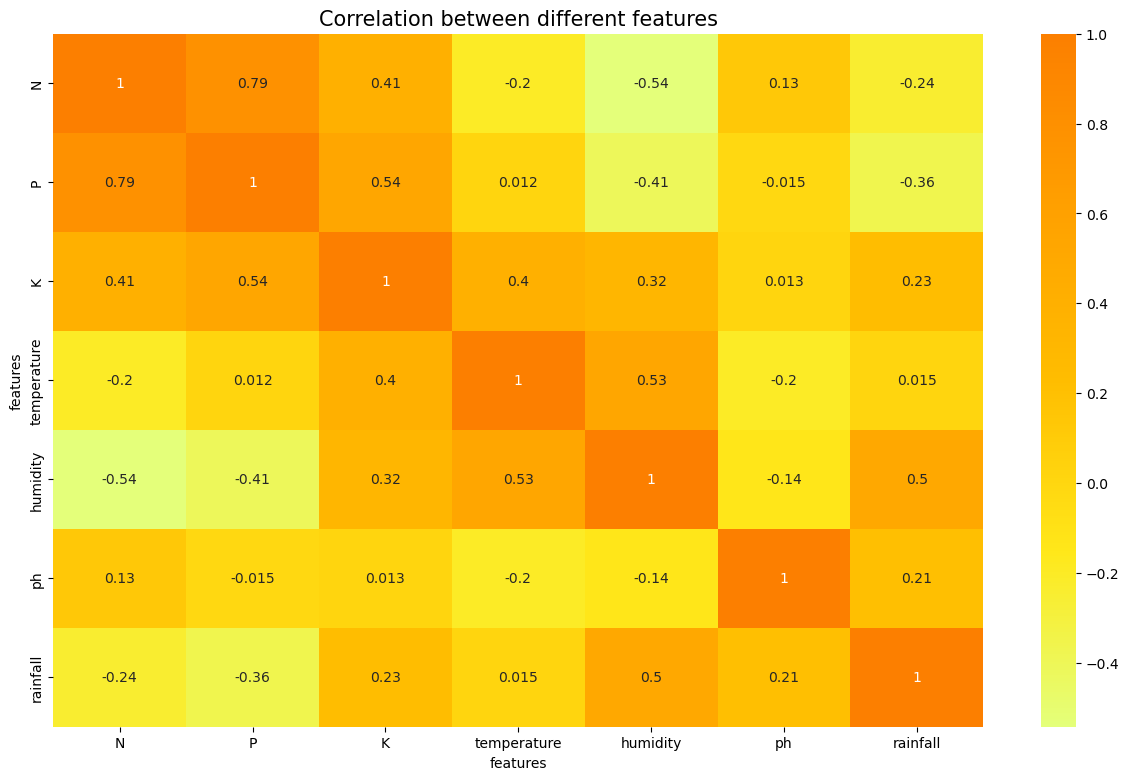

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

#### Inference from the Correlation Heatmap

**Key Observations**

- **Positive Correlations:** The heatmap primarily shows positive correlations between the features, indicated by the shades of yellow. This suggests that as one feature increases, the other tends to increase as well.

- **Strongest Correlation:** Nitrogen (N) and Potassium (K) exhibit the strongest positive correlation, as evidenced by the darkest shade of yellow in their corresponding cell.

- **Moderate Correlations:** Other features, such as phosphorus (P) and potassium (K), or temperature and humidity, also show moderate positive correlations.

**Potential Insights**

- **Nutrient Relationships:** The strong correlation between nitrogen and potassium suggests that these nutrients might interact in plant growth or be influenced by similar soil conditions.

- **Climatic Factors:** The positive correlation between temperature and humidity indicates that these climatic variables often co-occur, which can impact crop growth and yield.

- **Feature Importance:** The heatmap can help identify features that are highly correlated with other variables. This information can be useful for feature selection in machine learning models to avoid redundancy.

In [29]:
names=df['label'].unique()
encoder =LabelEncoder()
df['label']=encoder.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,4
1,85,58,41,21.770462,80.319644,7.038096,226.655537,4
2,60,55,44,23.004459,82.320763,7.840207,263.964248,4
3,74,35,40,26.491096,80.158363,6.980401,242.864034,4
4,78,42,42,20.130175,81.604873,7.628473,262.717340,4


The provided code replaces crop names in the 'label' column with numerical labels using label encoding. This transformation is commonly used in machine learning to convert categorical data into a format that algorithms can process. The LabelEncoder from scikit-learn assigns a unique numerical label to each unique crop name, facilitating numerical analysis and model training.

In [50]:
print("\nOriginal Label to Encoded Mapping:")
for original_label, encoded_label in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{original_label}: {encoded_label}")


Original Label to Encoded Mapping:
banana: 0
coconut: 1
jute: 2
maize: 3
rice: 4


In [30]:
df['label'].value_counts()

4    100
3    100
0    100
1    100
2    100
Name: label, dtype: int64

In [31]:
x=df.drop(['label'],axis=1)
y=df['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=42)

By dropping the 'label' column from the features, we ensure that the model does not have access to the target labels during training, which helps prevent data leakage and ensures unbiased model evaluation during testing.

In [32]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtrain=pd.DataFrame(xtrain,columns=x.columns)
xtrain.head()

,N,P,K,temperature,humidity,ph,rainfall
0,-0.117285,-0.559212,0.579292,-0.779062,0.306668,1.555345,1.707066
1,-0.081989,-0.109478,-1.711176,-0.222151,-0.932550,0.656183,-0.797855
2,0.659238,-0.649159,0.212817,-0.120297,0.034576,-0.231399,0.558125
3,0.447459,-0.514239,0.487673,-1.305911,0.251016,-0.013064,2.143621
4,0.906313,-0.289372,-0.062039,0.062578,-0.356248,2.024304,0.642672


In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1,random_state=42)


In [34]:
models={'Logistic Regression':LogisticRegression(),
        'Random Forest':RandomForestClassifier(),
        'Tree':DecisionTreeClassifier(),
        'SVC':SVC(),
        'xGBoost':XGBClassifier()
       }
def fit_and_Score(models,xtrain,xtest,ytrain,ytest):
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        model_score[name]=model.score(xtest,ytest)
    return model_score

In [35]:
model_score= fit_and_Score(models,xtrain,xtest,ytrain,ytest)
model_score

{'Logistic Regression': 1.0,
 'Random Forest': 1.0,
 'Tree': 1.0,
 'SVC': 0.9,
 'xGBoost': 1.0}

In [36]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']


In [37]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

#### Machine Learning Model Evaluation Process

In the below code snippet, common steps for evaluating multiple machine learning models are implemented. Here's a breakdown of the common steps:

1. **Model Initialization and Fitting:**

- Each machine learning model (e.g., Logistic Regression, Random Forest, etc.) is initialized with specific parameters and then fitted to the training data (xtrain and ytrain) using the fit() method.

2. **Cross-Validation Score Calculation:**

- Cross-validation scores are calculated using the cross_val_score() function with 5-fold cross-validation. This provides an estimate of the model's performance on unseen data.

3. **Train and Test Accuracy:**

- Train and test accuracies are calculated using the score() method on both the training and testing datasets. This helps assess how well the model performs on the training and unseen testing data.

4. **Appending Accuracy and Model Name:**

- The test accuracy and the name of the model are appended to lists (acc and model) for later comparison and visualization.

5. **Predictions and Evaluation:**

- The model makes predictions on the testing data (xtest) using the predict() method and calculates the accuracy score using the accuracy_score() function.

6. **Confusion Matrix Visualization:**

- A confusion matrix is generated using the confusion_matrix() function to evaluate the model's performance in terms of true positive, false positive, true negative, and false negative predictions. It is visualized using seaborn's heatmap.

7. **Classification Report Printing:**

- The classification report is printed using the classification_report() function, providing precision, recall, F1-score, and support for each class.

8. **Overall Performance Summary:**

- A summary line is printed, indicating the model name and its accuracy percentage.
These steps are repeated for each machine learning model, allowing for comparison of their performances based on various evaluation metrics.

### logistic regression

Cross Validation Score (Logistic Regression): [0.96666667 0.95555556 0.96666667 0.95555556 0.95555556]
Logistic Regression Train Accuracy: 0.9644444444444444
Logistic Regression Test Accuracy: 1.0
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


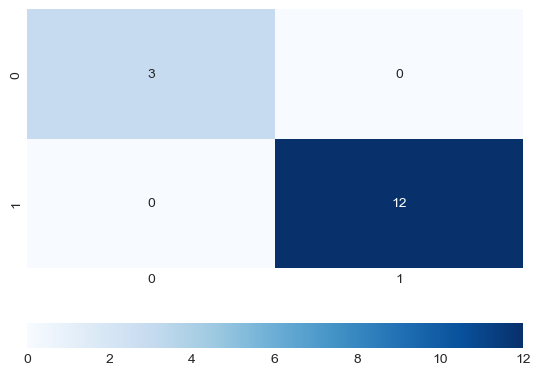

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

.:. Logistic Regression: 100.000% .:.


In [54]:
# Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(xtrain, ytrain)

# Cross-validation score calculation
score_lr = cross_val_score(model_lr, xtrain, ytrain, cv=5)
print("Cross Validation Score (Logistic Regression):", score_lr)

# Train and test accuracy
train_score_lr = model_lr.score(xtrain, ytrain)
test_score_lr = model_lr.score(xtest, ytest)
print("Logistic Regression Train Accuracy:", train_score_lr)
print("Logistic Regression Test Accuracy:", test_score_lr)

# Append accuracy and model name to lists
acc.append(test_score_lr)
model.append('Logistic Regression')

# Predictions and evaluation
y_pred_lr = model_lr.predict(xtest)
lr_acc = accuracy_score(y_pred_lr, ytest)

probabilities_rf = model_lr.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm_lr = confusion_matrix(ytest, y_pred_lr, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_lr, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

# Classification report printing
print(classification_report(ytest, y_pred_lr))
print('.:. Logistic Regression:'+'\033[1m {:.3f}%'.format(lr_acc*100)+' .:.')

### Randomforest

Cross Validation Scores (Random Forest): [0.97777778 0.97777778 0.97777778 0.98888889 0.97777778]
Mean Cross Validation Score (Random Forest): 0.980
Random Forest Train Accuracy: 1.000
Random Forest Test Accuracy: 1.000
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


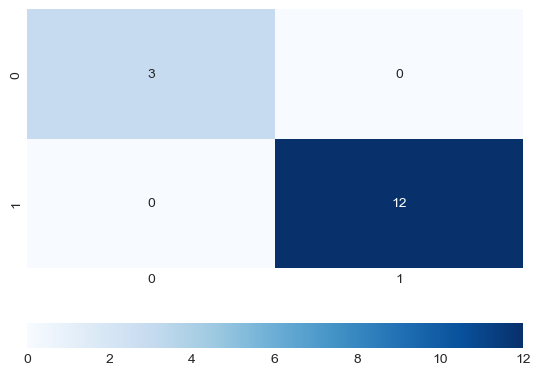

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

.:. Random Forest: 100.000% .:.


In [55]:
# Train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(xtrain, ytrain)

# Cross-validation score calculation
score_rf = cross_val_score(model_rf, xtrain, ytrain, cv=5)
print("Cross Validation Scores (Random Forest):", score_rf)
print("Mean Cross Validation Score (Random Forest): {:.3f}".format(score_rf.mean()))

# Train and test accuracy
train_score_rf = model_rf.score(xtrain, ytrain)
test_score_rf = model_rf.score(xtest, ytest)
print("Random Forest Train Accuracy: {:.3f}".format(train_score_rf))
print("Random Forest Test Accuracy: {:.3f}".format(test_score_rf))

# Append accuracy and model name to lists
acc.append(test_score_rf)
model.append('Random Forest')

# Predictions and evaluation
y_pred_rf = model_rf.predict(xtest)
rf_acc = accuracy_score(ytest, y_pred_rf)  # Corrected the use of accuracy_score

# Get predicted probabilities
probabilities_rf = model_rf.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm_rf = confusion_matrix(ytest, y_pred_rf, labels=[0, 1])
print('Confusion Matrix')
sns.heatmap(cm_rf, cmap='Blues', annot=True, fmt='d', cbar_kws={'orientation': 'horizontal'})
plt.show()

# Classification report printing
print('Classification Report:')
print(classification_report(ytest, y_pred_rf))

# Final accuracy print statement
print('.:. Random Forest: {:.3f}% .:.'.format(rf_acc * 100))


### Gaussian Naive Bayes

Cross Validation Score (Gaussian Naive Bayes): [0.97777778 0.97777778 0.97777778 0.98888889 0.96666667]
Gaussian Naive Bayes Train Accuracy: 0.9777777777777777
Gaussian Naive Bayes Test Accuracy: 1.0
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


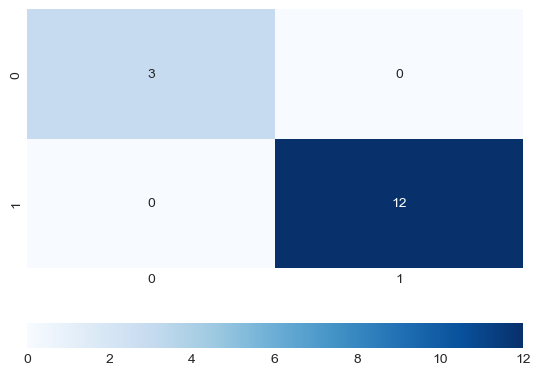

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

.:. Gaussian Naive Bayes: 100.000% .:.


In [56]:
# Gaussian Naive Bayes
model_nb = GaussianNB()
model_nb.fit(xtrain, ytrain)

# Cross-validation score calculation
score_nb = cross_val_score(model_nb, xtrain, ytrain, cv=5)
print("Cross Validation Score (Gaussian Naive Bayes):", score_nb)

# Train and test accuracy
train_score_nb = model_nb.score(xtrain, ytrain)
test_score_nb = model_nb.score(xtest, ytest)
print("Gaussian Naive Bayes Train Accuracy:", train_score_nb)
print("Gaussian Naive Bayes Test Accuracy:", test_score_nb)

# Append accuracy and model name to lists
acc.append(test_score_nb)
model.append('Gaussian Naive Bayes')

# Predictions and evaluation
y_pred_nb = model_nb.predict(xtest)
nb_acc = accuracy_score(y_pred_nb, ytest)

probabilities_rf = model_nb.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm_nb = confusion_matrix(ytest, y_pred_nb, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_nb, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

# Classification report printing
print(classification_report(ytest, y_pred_nb))
print('.:. Gaussian Naive Bayes:'+'\033[1m {:.3f}%'.format(nb_acc*100)+' .:.')

### decision tree

Cross Validation Score (Decision Tree): [0.97777778 0.96666667 0.94444444 0.96666667 0.97777778]
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 1.0
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


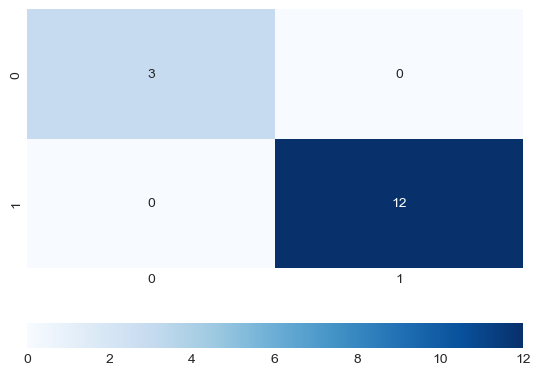

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

.:. Decision Tree: 100.000% .:.


In [57]:
# Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(xtrain, ytrain)

# Cross-validation score calculation
score_dt = cross_val_score(model_dt, xtrain, ytrain, cv=5)
print("Cross Validation Score (Decision Tree):", score_dt)

# Train and test accuracy
train_score_dt = model_dt.score(xtrain, ytrain)
test_score_dt = model_dt.score(xtest, ytest)
print("Decision Tree Train Accuracy:", train_score_dt)
print("Decision Tree Test Accuracy:", test_score_dt)

# Append accuracy and model name to lists
acc.append(test_score_dt)
model.append('Decision Tree')

# Predictions and evaluation
y_pred_dt = model_dt.predict(xtest)
dt_acc = accuracy_score(y_pred_dt, ytest)

probabilities_rf = model_dt.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm_dt = confusion_matrix(ytest, y_pred_dt, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_dt, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

# Classification report printing
print(classification_report(ytest, y_pred_dt))
print('.:. Decision Tree:'+'\033[1m {:.3f}%'.format(dt_acc*100)+' .:.')

### SVM

Cross Validation Score (SVM): [0.95555556 0.95555556 0.95555556 0.97777778 0.92222222]
SVM Train Accuracy: 0.9533333333333334
SVM Test Accuracy: 0.9
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


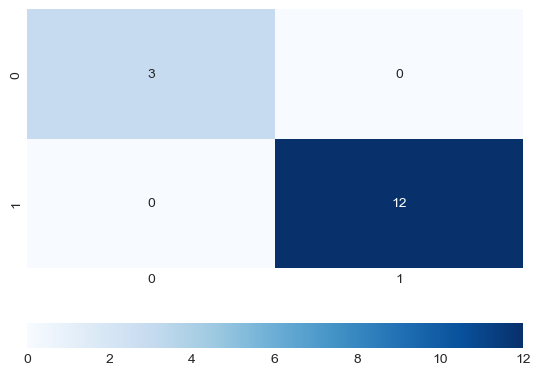

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       0.72      1.00      0.84        13
           3       1.00      1.00      1.00         7
           4       1.00      0.67      0.80        15

    accuracy                           0.90        50
   macro avg       0.94      0.93      0.93        50
weighted avg       0.93      0.90      0.90        50

.:. SVM: 90.000% .:.


In [59]:
# Support Vector Machine (SVM)
model_svm = SVC(random_state=42,probability=True)
model_svm.fit(xtrain, ytrain)

# Cross-validation score calculation
score_svm = cross_val_score(model_svm, xtrain, ytrain, cv=5)
print("Cross Validation Score (SVM):", score_svm)

# Train and test accuracy
train_score_svm = model_svm.score(xtrain, ytrain)
test_score_svm = model_svm.score(xtest, ytest)
print("SVM Train Accuracy:", train_score_svm)
print("SVM Test Accuracy:", test_score_svm)

# Append accuracy and model name to lists
acc.append(test_score_svm)
model.append('SVM')

# Predictions and evaluation
y_pred_svm = model_svm.predict(xtest)
svm_acc = accuracy_score(y_pred_svm, ytest)

probabilities_rf = model_svm.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm_svm = confusion_matrix(ytest, y_pred_svm, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm_svm, cmap='Blues', annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()

# Classification report printing
print(classification_report(ytest, y_pred_svm))
print('.:. SVM:'+'\033[1m {:.3f}%'.format(svm_acc*100)+' .:.')

### XGBoost

Cross Validation Score (XGBoost): [0.96666667 0.97777778 0.98888889 0.98888889 0.95555556]
XGBoost Train Accuracy: 1.0
XGBoost Test Accuracy: 1.0
Top Two Labels Overall:
['jute', 'rice']
Confusion Matrix


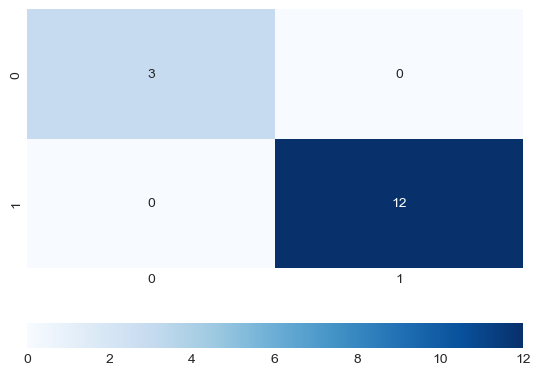

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        15

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

.:. XGB Classifier: 100.000% .:.


In [60]:
model6 = XGBClassifier(random_state=42)
model6.fit(xtrain,ytrain)

# Cross-validation score calculation
score_xgb = cross_val_score(model6, xtrain, ytrain, cv=5)
print("Cross Validation Score (XGBoost):", score_xgb)

# Train and test accuracy
train_score_xgb = model6.score(xtrain, ytrain)
test_score_xgb = model6.score(xtest, ytest)
print("XGBoost Train Accuracy:", train_score_xgb)
print("XGBoost Test Accuracy:", test_score_xgb)

# Append accuracy and model name to lists
acc.append(test_score_xgb)
model.append('XGBoost')

y_pred_XGBC = model6.predict(xtest)
XGBAcc = accuracy_score(y_pred_XGBC, ytest)

probabilities_rf = model6.predict_proba(xtest)

# Aggregate probabilities to find the top two labels overall
mean_probabilities = np.mean(probabilities_rf, axis=0)
top_two_labels_indices = np.argsort(mean_probabilities)[-2:]

# Assuming you have class labels as a list
class_labels = ['banana', 'coconut', 'jute', 'maize', 'rice']  # Replace with your actual class labels

# Convert indices to class labels
top_two_class_labels = [class_labels[idx] for idx in top_two_labels_indices]

# Display top two labels overall
print("Top Two Labels Overall:")
print(top_two_class_labels)

# Confusion matrix visualization
cm=confusion_matrix(ytest, y_pred_XGBC, labels=[0,1])
print('Confusion Matrix')
sns.heatmap(cm,cmap='Blues',annot=True,cbar_kws= {'orientation':'horizontal'} )
plt.show()

# Classification report printing
print(classification_report(ytest, y_pred_XGBC))
print('.:. XGB Classifier:'+'\033[1m {:.3f}%'.format(XGBAcc*100)+' .:.')

### Acuracy Comparison

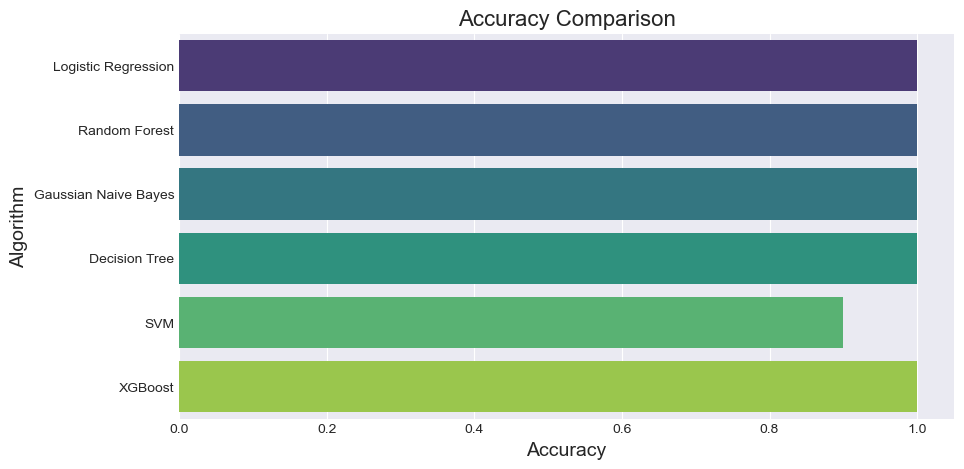

Logistic Regression --> 1.0
Random Forest --> 1.0
Gaussian Naive Bayes --> 1.0
Decision Tree --> 1.0
SVM --> 0.9
XGBoost --> 1.0


In [61]:
# Set the style
plt.style.use('seaborn-darkgrid')

# Create the plot
plt.figure(figsize=[10,5], dpi=100)
plt.title('Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

# Customize the barplot
sns.barplot(x=acc, y=model, palette='viridis')

# Show the plot
plt.show()

# Display accuracy values for each model
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)


In [65]:
import joblib


In [66]:
# Save the best model
joblib.dump(model_rf, "models/crop_recomend_model.pkl")


In [69]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.2.1
